# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

Python-dotenv could not parse statement starting at line 5


True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18641975,
            "total_supply": 18641975,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 49056.0,
                    "volume_24h": 62913910410,
                    "market_cap": 914937984186,
                    "percentage_change_1h": 0.118035137372543,
                    "percentage_change_24h": 11.8464641675665,
                    "percentage_change_7d": -14.9361816304203,
                    "percent_change_1h": 0.118035137372543,
                    "percent_change_24h": 11.8464641675665,
                    "percent_change_7d": -14.9361816304203
                }
            },
            "last_updated": 1614618942
        }
    },
    "metadata": {
        "timestamp": 1614618942,
        "num_crypt

In [7]:
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_max = btc_data['data']['1']['max_supply']

In [8]:
btc_price

49056.0

In [9]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))

# Compute current value of my crpto

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114872867,
            "total_supply": 114872867,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1533.49,
                    "volume_24h": 32502399085,
                    "market_cap": 177394540626,
                    "percentage_change_1h": -0.967965592322869,
                    "percentage_change_24h": 13.0497670051186,
                    "percentage_change_7d": -21.0119898163571,
                    "percent_change_1h": -0.967965592322869,
                    "percent_change_24h": 13.0497670051186,
                    "percent_change_7d": -21.0119898163571
                }
            },
            "last_updated": 1614619121
        }
    },
    "metadata": {
        "timestamp": 1614619121,
        "num_

In [10]:
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

In [11]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_price:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_price:0.2f}")

The current value of your 1.2 BTC is $49056.00
The current value of your 5.3 ETH is $1533.49


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [14]:
# Format current date as ISO format
start = pd.Timestamp('2021/02/18', tz ='America/New_York').isoformat()
end = pd.Timestamp('2021/02/18', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start,
    end=end
).df
    
ticker_data

AGG                                     SPY  \
                             open    high     low  close   volume    open   
2021-02-18 00:00:00-05:00  116.14  116.28  116.03  116.2  3910324  389.59   

                                                              
                              high     low   close    volume  
2021-02-18 00:00:00-05:00  391.515  387.74  390.75  52370380

In [15]:
# Pick AGG and SPY close prices
agg_close = float(ticker_data.AGG['close'])
spy_close = float(ticker_data.SPY['close'])

In [16]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $116.2
Current SPY closing price: $390.75


In [17]:
my_spy_value = my_spy * spy_close
my_agg_value = my_agg * agg_close

# Set the data for the shares value DataFrame
value_data = {
    "MSFT": [msft_value],
    "AAPL": [aapl_value]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

In [18]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close
my_agg_value = my_agg * agg_close
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19537.50
The current value of your 200 AGG shares is $23240.00


In [19]:
crypto = btc_price + eth_price
shares = my_spy_value + my_agg_value

In [20]:
crypto

50589.49

In [21]:
shares

42777.5

In [22]:
df = pd.DataFrame([[crypto],
[shares]]).rename(index={0: "Crypto", 1: "Shares"})
df.rename_axis("Savings")

,0
Savings,
Crypto,50589.49
Shares,42777.50


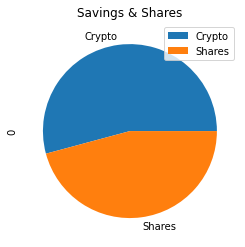

In [23]:
# Plot savings pie chart
df.plot.pie(y=0, title = "Savings & Shares")

### Savings Health Analysis

In [24]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
#print(emergency_fund)
# Calculate total amount of savings
savings = df[0].sum()
# Validate saving health
emergency_savings = pd.DataFrame([emergency_fund, savings])
emergency_savings.index = ['Emergency', 'Savings']
emergency_savings.columns = ['Budget']

In [25]:
emergency_savings

,Budget
Emergency,36000.00
Savings,93366.99


In [26]:
for x in emergency_savings:
    if savings > emergency_fund:
        print(f'Go on Vacation!')
    elif savings < emergency_fund:
        print('Stay home and save.')

Go on Vacation!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of 30 years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2016-04-07', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
stock_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
2015-11-12 00:00:00-05:00  108.35  108.45  108.2101  108.35  1885521  206.50   
2015-11-13 00:00:00-05:00  108.48  108.59  108.4459  108.57  2714199  204.35   
2015-11-16 00:00:00-05:00  108.63  108.70  108.5600  108.63  3037233  202.32   
2015-11-17 00:00:00-05:00  108.49  108.78  108.3600  108.71  2111084  205.99   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597  206.04   

                                                               
                             high      low   close     volume  
2015-11-12 00:00:00-05:00  207.06  204.820  204.89   95298675  
2015-11-13 00:00:00-05:00  204.67  202.435  202.54  120335951  
2015-11-16 00:00:00-05:00  205.64  202.180  205.60   90591238  
2015-11-17 00:00:00-05:00  207.04  204.880  205.38  100515112  
2015-11-18 00:00:00-05:00  208.90  205.990  208.71   94448031

In [29]:
print(start_date)
print(end_date)
len(stock_data.index)

2015-08-07T00:00:00-04:00
2016-04-07T00:00:00-04:00


100

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim = MCSimulation(
    portfolio_data = stock_data,
    #weights = [.33,.33,.33],
    num_simulation = 100,
    num_trading_days = 252*30
)
mc_sim.portfolio_data

AGG                                       \
                             open      high       low   close   volume   
2015-11-12 00:00:00-05:00  108.35  108.4500  108.2101  108.35  1885521   
2015-11-13 00:00:00-05:00  108.48  108.5900  108.4459  108.57  2714199   
2015-11-16 00:00:00-05:00  108.63  108.7000  108.5600  108.63  3037233   
2015-11-17 00:00:00-05:00  108.49  108.7800  108.3600  108.71  2111084   
2015-11-18 00:00:00-05:00  108.65  108.7100  108.5400  108.62  1824597   
...                           ...       ...       ...     ...      ...   
2016-04-01 00:00:00-04:00  110.53  110.6599  110.3500  110.54  5013983   
2016-04-04 00:00:00-04:00  110.60  110.6700  110.5100  110.59  3018930   
2016-04-05 00:00:00-04:00  110.95  110.9750  110.7100  110.79  2617545   
2016-04-06 00:00:00-04:00  110.80  110.8000  110.6235  110.75  1858620   
2016-04-07 00:00:00-04:00  110.98  111.0500  110.7700  110.99  1608325   

                                           SPY                           \
                          daily_return    open    high      low   close   
2015-11-12 00:00:00-05:00          NaN  206.50  207.06  204.820  204.89   
2015-11-13 00:00:00-05:00     0.002030  204.35  204.67  202.435  202.54   
2015-11-16 00:00:00-05:00     0.000553  202.32  205.64  202.180  205.60   
2015-11-17 00:00:00-05:00     0.000736  205.99  207.04  204.880  205.38   
2015-11-18 00:00:00-05:00    -0.000828  206.04  208.90  205.990  208.71   
...                                ...     ...     ...      ...     ...   
2016-04-01 00:00:00-04:00    -0.002527  204.34  207.14  203.980  206.89   
2016-04-04 00:00:00-04:00     0.000452  206.83  207.07  205.890  206.27   
2016-04-05 00:00:00-04:00     0.001808  204.67  205.26  203.890  204.19   
2016-04-06 00:00:00-04:00    -0.000361  204.29  206.49  203.980  206.43   
2016-04-07 00:00:00-04:00     0.002167  205.14  205.56  203.090  203.94   

                                                   
                              volume daily_return  
2015-11-12 00:00:00-05:00   95298675          NaN  
2015-11-13 00:00:00-05:00  120335951    -0.011470  
2015-11-16 00:00:00-05:00   90591238     0.015108  
2015-11-17 00:00:00-05:00  100515112    -0.001070  
2015-11-18 00:00:00-05:00   94448031     0.016214  
...                              ...          ...  
2016-04-01 00:00:00-04:00   82800637     0.006519  
2016-04-04 00:00:00-04:00   47328510    -0.002997  
2016-04-05 00:00:00-04:00   67894686    -0.010084  
2016-04-06 00:00:00-04:00   75909355     0.010970  
2016-04-07 00:00:00-04:00   90240651    -0.012062  

[100 rows x 12 columns]

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005112,0.987867,1.001177,0.998298,1.003836,1.003546,0.994986,1.006429,0.998272,1.002300,...,0.994625,0.993777,1.000619,0.997239,0.993413,0.993487,1.001680,0.994416,0.996765,0.994561
2,1.000412,0.990487,1.004267,0.996012,1.007807,1.010152,0.992559,1.001073,0.997210,1.006750,...,0.994726,0.989776,0.999219,0.986248,0.989714,0.996939,1.001449,0.995411,0.998450,0.999937
3,1.000589,0.995620,1.005058,0.999948,1.017919,1.003202,0.993680,0.997669,0.996041,1.002700,...,0.992791,0.982944,0.988694,0.978700,0.989346,0.998380,0.996137,0.984047,0.990517,1.009056
4,1.006511,0.991890,1.002738,1.004342,1.017228,1.004162,1.001184,0.999195,0.993585,1.001024,...,0.992385,0.983445,0.988989,0.972013,0.987549,0.999060,0.994690,0.987737,0.986721,0.998384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.763612,2.228327,8.470443,1.255944,4.724972,2.496180,3.284164,6.566066,3.307840,3.144410,...,1.560781,2.891083,4.183686,3.224047,1.499819,4.052454,2.443753,0.907870,1.272099,3.967934
7557,3.789641,2.210772,8.506226,1.264568,4.720701,2.511512,3.322626,6.611468,3.299211,3.131629,...,1.569331,2.877300,4.198944,3.227578,1.497923,4.028506,2.453700,0.913398,1.255547,3.990425
7558,3.812596,2.217367,8.575653,1.273617,4.720030,2.514935,3.351746,6.603324,3.290651,3.133835,...,1.581659,2.900591,4.173219,3.205235,1.504494,4.002988,2.448226,0.921211,1.266918,3.971675
7559,3.839970,2.193474,8.598666,1.277450,4.701898,2.512891,3.325757,6.587896,3.288012,3.130669,...,1.587100,2.894381,4.202118,3.201713,1.509779,4.025544,2.449754,0.933030,1.258763,3.956775


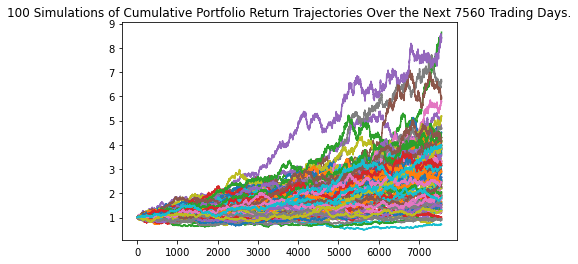

In [32]:
# Plot simulation outcomes
mc_sim.plot_simulation()

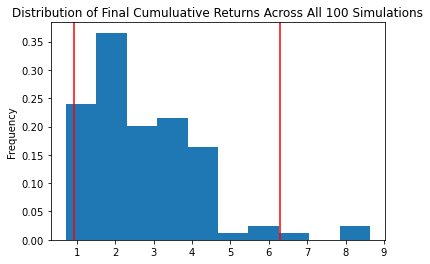

In [33]:
# Plot probability distribution and confidence intervals
mc_sim.plot_distribution()

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = mc_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              2.732269
std               1.488931
min               0.709767
25%               1.627484
50%               2.394738
75%               3.634606
max               8.640928
95% CI Lower      0.912488
95% CI Upper      6.304336
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18249.76 and $126086.73


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [37]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment_new,2)
ci_upper = round(tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $27374.64 and $189130.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_sim2 = MCSimulation(
    portfolio_data = stock_data,
    #weights = [.33,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)
mc_sim2.portfolio_data

AGG                                       \
                             open      high       low   close   volume   
2015-11-12 00:00:00-05:00  108.35  108.4500  108.2101  108.35  1885521   
2015-11-13 00:00:00-05:00  108.48  108.5900  108.4459  108.57  2714199   
2015-11-16 00:00:00-05:00  108.63  108.7000  108.5600  108.63  3037233   
2015-11-17 00:00:00-05:00  108.49  108.7800  108.3600  108.71  2111084   
2015-11-18 00:00:00-05:00  108.65  108.7100  108.5400  108.62  1824597   
...                           ...       ...       ...     ...      ...   
2016-04-01 00:00:00-04:00  110.53  110.6599  110.3500  110.54  5013983   
2016-04-04 00:00:00-04:00  110.60  110.6700  110.5100  110.59  3018930   
2016-04-05 00:00:00-04:00  110.95  110.9750  110.7100  110.79  2617545   
2016-04-06 00:00:00-04:00  110.80  110.8000  110.6235  110.75  1858620   
2016-04-07 00:00:00-04:00  110.98  111.0500  110.7700  110.99  1608325   

                                           SPY                           \
                          daily_return    open    high      low   close   
2015-11-12 00:00:00-05:00          NaN  206.50  207.06  204.820  204.89   
2015-11-13 00:00:00-05:00     0.002030  204.35  204.67  202.435  202.54   
2015-11-16 00:00:00-05:00     0.000553  202.32  205.64  202.180  205.60   
2015-11-17 00:00:00-05:00     0.000736  205.99  207.04  204.880  205.38   
2015-11-18 00:00:00-05:00    -0.000828  206.04  208.90  205.990  208.71   
...                                ...     ...     ...      ...     ...   
2016-04-01 00:00:00-04:00    -0.002527  204.34  207.14  203.980  206.89   
2016-04-04 00:00:00-04:00     0.000452  206.83  207.07  205.890  206.27   
2016-04-05 00:00:00-04:00     0.001808  204.67  205.26  203.890  204.19   
2016-04-06 00:00:00-04:00    -0.000361  204.29  206.49  203.980  206.43   
2016-04-07 00:00:00-04:00     0.002167  205.14  205.56  203.090  203.94   

                                                   
                              volume daily_return  
2015-11-12 00:00:00-05:00   95298675          NaN  
2015-11-13 00:00:00-05:00  120335951    -0.011470  
2015-11-16 00:00:00-05:00   90591238     0.015108  
2015-11-17 00:00:00-05:00  100515112    -0.001070  
2015-11-18 00:00:00-05:00   94448031     0.016214  
...                              ...          ...  
2016-04-01 00:00:00-04:00   82800637     0.006519  
2016-04-04 00:00:00-04:00   47328510    -0.002997  
2016-04-05 00:00:00-04:00   67894686    -0.010084  
2016-04-06 00:00:00-04:00   75909355     0.010970  
2016-04-07 00:00:00-04:00   90240651    -0.012062  

[100 rows x 12 columns]

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_sim2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003636,0.994305,0.992989,0.999687,0.991073,0.995272,0.994977,0.992009,0.994038,1.000543,...,0.994421,0.997875,1.000443,0.995583,1.001629,1.003769,0.992369,0.993530,0.999401,1.003269
2,1.003851,0.991958,0.990928,0.989113,0.991283,0.988560,0.987237,0.993889,0.991420,1.004727,...,0.985184,1.004684,1.006482,1.001124,0.997622,1.009026,0.989495,0.982092,1.002229,1.003876
3,1.011239,0.986447,0.990886,1.002807,0.990381,0.995633,0.993259,0.992401,0.998701,1.005197,...,0.989860,1.003971,1.002606,0.995783,0.989857,0.996650,0.993946,0.972493,1.005078,0.994583
4,1.008655,0.979555,0.997089,1.000396,0.991590,1.003159,1.005041,0.993247,0.991671,1.001190,...,0.988441,1.014153,0.999686,0.999271,0.985520,0.995974,0.987696,0.977617,1.002310,0.991064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.275640,1.468600,0.757173,0.950518,1.585390,1.004201,1.153169,0.813850,1.401577,1.759361,...,1.073128,1.080078,0.859726,1.530424,1.337233,1.053241,1.322717,1.379532,0.936758,1.053278
1257,1.281030,1.470074,0.762421,0.943998,1.589969,1.006593,1.153766,0.815732,1.398810,1.770401,...,1.065772,1.067009,0.861678,1.528090,1.338982,1.055319,1.330065,1.369386,0.937834,1.060726
1258,1.287482,1.475373,0.762899,0.949953,1.585800,1.003777,1.153637,0.817680,1.399255,1.772344,...,1.066704,1.070392,0.868063,1.524608,1.346627,1.052627,1.331226,1.356158,0.936400,1.067302
1259,1.281620,1.457780,0.767347,0.939898,1.581776,0.996381,1.158364,0.816498,1.409981,1.760793,...,1.060561,1.074145,0.867475,1.533156,1.353599,1.050535,1.324966,1.352337,0.931974,1.064879


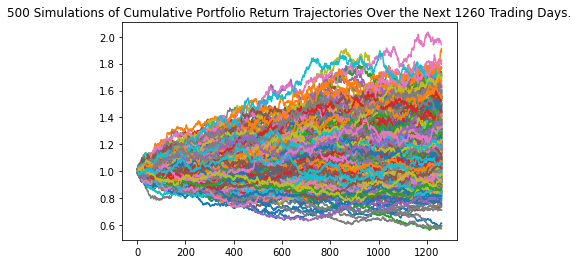

In [41]:
# Plot simulation outcomes
mc_sim2.plot_simulation()

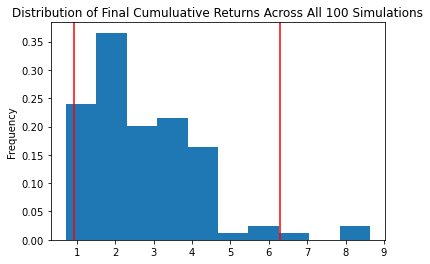

In [42]:
# Plot probability distribution and confidence intervals
mc_sim.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = mc_sim2.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.184041
std               0.241509
min               0.575284
25%               1.015168
50%               1.162322
75%               1.339422
max               1.941013
95% CI Lower      0.789385
95% CI Upper      1.698930
Name: 1260, dtype: float64


In [44]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $47363.12 and $101935.77


### Ten Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim10 = MCSimulation(
    portfolio_data = stock_data,
    num_simulation = 500,
    num_trading_days = 252*10
)


# Print the simulation input data
mc_sim10.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
2015-11-12 00:00:00-05:00  108.35  108.45  108.2101  108.35  1885521   
2015-11-13 00:00:00-05:00  108.48  108.59  108.4459  108.57  2714199   
2015-11-16 00:00:00-05:00  108.63  108.70  108.5600  108.63  3037233   
2015-11-17 00:00:00-05:00  108.49  108.78  108.3600  108.71  2111084   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597   

                                           SPY                           \
                          daily_return    open    high      low   close   
2015-11-12 00:00:00-05:00          NaN  206.50  207.06  204.820  204.89   
2015-11-13 00:00:00-05:00     0.002030  204.35  204.67  202.435  202.54   
2015-11-16 00:00:00-05:00     0.000553  202.32  205.64  202.180  205.60   
2015-11-17 00:00:00-05:00     0.000736  205.99  207.04  204.880  205.38   
2015-11-18 00:00:00-05:00    -0.000828  206.04  208.90  205.990  208.71   

                                                   
                              volume daily_return  
2015-11-12 00:00:00-05:00   95298675          NaN  
2015-11-13 00:00:00-05:00  120335951    -0.011470  
2015-11-16 00:00:00-05:00   90591238     0.015108  
2015-11-17 00:00:00-05:00  100515112    -0.001070  
2015-11-18 00:00:00-05:00   94448031     0.016214

In [47]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007136,1.001004,1.000108,0.997862,1.008599,1.000649,1.004408,0.998778,0.997079,0.998230,...,0.998344,0.999915,1.010659,1.005719,0.994942,1.005841,1.000526,0.995728,1.003023,1.009115
2,1.008763,1.013461,0.995996,0.998172,1.003347,0.994482,1.000822,0.997847,0.989186,0.994565,...,1.003439,0.991635,1.015278,0.999435,0.995996,1.002337,0.997529,0.991071,1.014256,1.007824
3,1.011420,1.019251,0.988050,0.989447,1.009411,0.992830,1.008862,0.990906,0.990361,1.004423,...,1.011201,0.985360,1.013829,0.994383,1.009554,0.994057,0.996985,0.995046,1.025037,1.014482
4,1.016061,1.019242,0.981936,0.990827,1.005830,0.989520,1.010523,0.989584,0.993665,1.004795,...,1.018518,0.982633,1.009811,0.988520,1.000943,0.995106,1.001068,0.987621,1.027361,1.011924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.112371,1.281215,1.753209,1.561269,0.960893,0.931488,1.542873,1.008306,2.064348,2.061334,...,2.126149,1.866854,1.530258,1.367430,1.541948,1.487998,1.138323,1.810951,2.884082,0.640881
2517,1.114243,1.288788,1.754753,1.551442,0.970952,0.940901,1.547515,1.014056,2.073458,2.046736,...,2.120941,1.868273,1.538163,1.368167,1.560747,1.497508,1.130850,1.813563,2.895977,0.643363
2518,1.117679,1.296509,1.752807,1.550291,0.965274,0.946134,1.547141,1.006999,2.074397,2.032054,...,2.115776,1.866075,1.526604,1.363084,1.560073,1.505173,1.127198,1.823516,2.915380,0.641599
2519,1.118293,1.297513,1.780756,1.557578,0.966487,0.950421,1.537920,1.004254,2.093514,2.048746,...,2.104616,1.861816,1.532971,1.379395,1.556943,1.498941,1.134414,1.840076,2.906045,0.636869


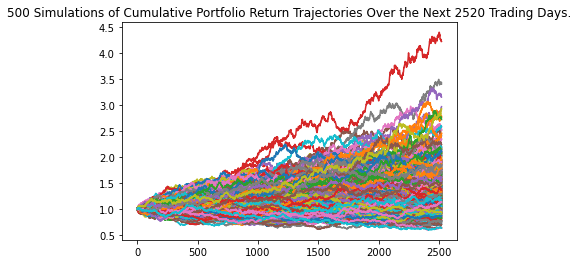

In [48]:
# Plot simulation outcomes
mc_sim10.plot_simulation()

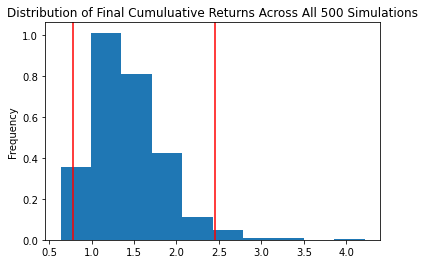

In [49]:
# Plot probability distribution and confidence intervals
mc_sim10.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = mc_sim10.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.421595
std               0.432290
min               0.635274
25%               1.119149
50%               1.356655
75%               1.643263
max               4.217326
95% CI Lower      0.782087
95% CI Upper      2.452482
Name: 2520, dtype: float64


In [51]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $46925.2 and $147148.93
